In [2]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split ## zmiana z .cross_validation na .model_selection

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [ ]:
##statsmodels

In [3]:
df = sm.datasets.fair.load_pandas().data

In [4]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [ ]:
##regresja liniowa

In [ ]:
##podstawianie fukcji liniowej pod równanie 1/1+e^-##ax+b.... :D

In [ ]:
## źródła do regresji logicznej

In [ ]:
## z źródła można wyciągnąć sporo danych

In [5]:
def affair_check(x):
    if x !=0: ##!=not equal
        return 1
    else:
        return 0

In [6]:
df['Had_Affair'] = df['affairs'].apply(affair_check)
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [7]:
##grupowanie
df.groupby('Had_Affair').mean() ##średnia

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


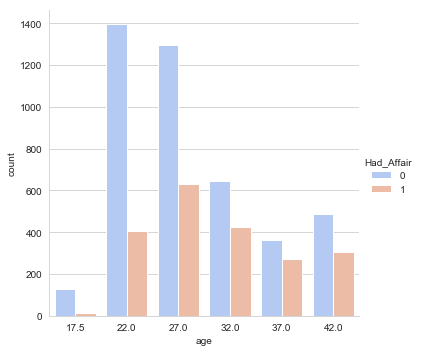

In [13]:
sns.catplot('age',data=df,hue='Had_Affair',palette='coolwarm',kind='count') ##factorplot już nie działa teraz jest catplot

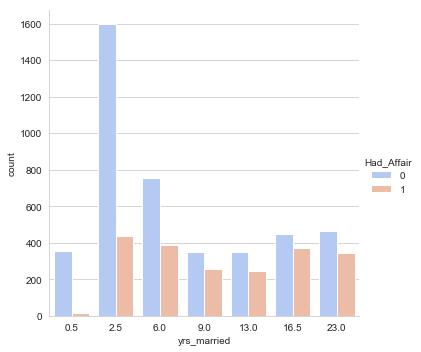

In [14]:
sns.catplot('yrs_married',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

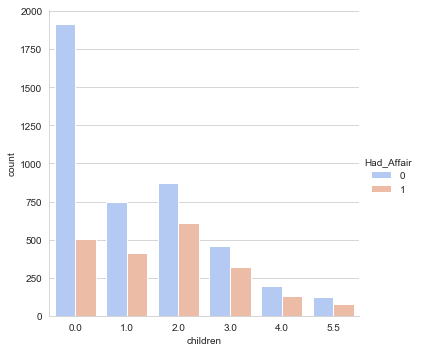

In [15]:
sns.catplot('children',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

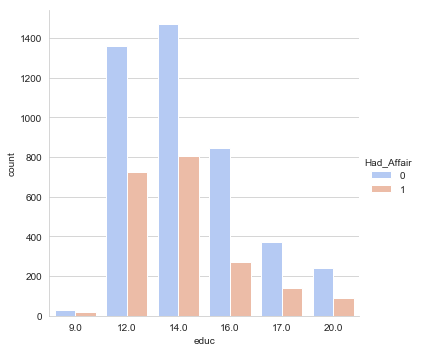

In [16]:
sns.catplot('educ',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

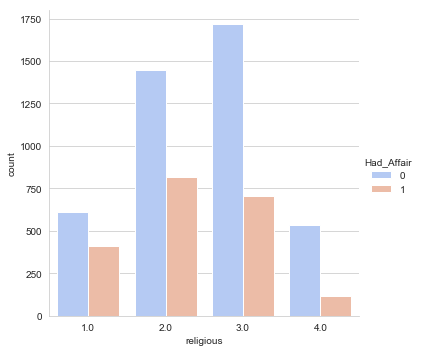

In [17]:
sns.catplot('religious',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

In [ ]:
##dummy variable

In [18]:
occ_dummies = pd.get_dummies(df['occupation'])

In [19]:
hus_occ_dumies = pd.get_dummies(df['occupation_husb'])

In [21]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [ ]:
#czy jest w pierwszej, drugiej czy innej kategorii zawodowej

In [22]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

In [24]:
hus_occ_dumies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [25]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [26]:
dummies = pd.concat([occ_dummies,hus_occ_dumies],axis=1)

In [27]:
X

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,1.333333


In [28]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [29]:
X = pd.concat([X,dummies],axis=1)

In [30]:
X

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0
5,4.0,27.0,9.0,0.0,2.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0
6,5.0,37.0,23.0,5.5,2.0,12.0,0.852174,0,0,0,0,1,0,0,0,0,1,0,0
7,5.0,37.0,23.0,5.5,2.0,12.0,1.826086,0,1,0,0,0,0,0,0,1,0,0,0
8,3.0,22.0,2.5,0.0,2.0,12.0,4.799999,0,0,1,0,0,0,0,0,1,0,0,0
9,3.0,27.0,6.0,0.0,1.0,16.0,1.333333,0,0,1,0,0,0,0,0,0,0,1,0


In [31]:
Y = df.Had_Affair

Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [32]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [ ]:
##multicolinearlity

In [ ]:
#wikipedia url

In [ ]:
#wieloraka koleratywnosć

In [33]:
X = X.drop('occ1',axis=1)

In [34]:
X = X.drop('hocc1',axis=1)

In [35]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


In [36]:
X = X.drop('affairs',axis=1)

In [37]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [38]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [39]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [ ]:
#ravel

In [40]:
Y = np.ravel(Y)

Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [41]:
log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

C:\Users\aleks\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

In [ ]:
##73% dokładności korelacji dla modelu pred.. nie miało romansu

In [42]:
Y.mean() ##ma roamns

0.3224945020420987

In [ ]:
#null error rate

In [43]:
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

In [44]:
coeff_df

,0,1
0,rate_marriage,[-0.6978854180026768]
1,age,[-0.056347032908152]
2,yrs_married,[0.10390556524027485]
3,children,[0.018172782105056292]
4,religious,[-0.3684960487396638]
5,educ,[0.008789834665963826]
6,occ2,[0.2979785839591037]
7,occ3,[0.6079160723958301]
8,occ4,[0.34603776729459984]
9,occ5,[0.9423651396317297]


In [ ]:
dodatni zwiększa prawdopodobieństow romansu ze wzrostem wartości
etc

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [47]:
log_model23 = LogisticRegression()
log_model23.fit(X_train,Y_train)

C:\Users\aleks\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
class_predict = log_model23.predict(X_test)

In [49]:
print metrics.accuracy_score(Y_test,class_predict)

SyntaxError: invalid syntax (<ipython-input-49-b2a5666a177a>, line 1)

In [50]:
from sklearn.metrics import classification_report

In [52]:
from sklearn import metrics

In [54]:
print (metrics.accuracy_score(Y_test,class_predict))

0.7211055276381909


In [ ]:
#techniki regularyzacji

In [ ]:
model nieliniowy na kolejnych wykładach
++ żródła do logostic analysis

In [ ]:
Part 9 (przejrzeć)

In [ ]:
url = 'https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20Logistic%20Regression.ipynb'